### Data Collection

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Import Libraries
import cv2
import numpy as np
import os
import time
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
# DATASET_PATH = './/data'
DATASET_PATH = '/content/drive/MyDrive/data'
labels = ["no-gesture", "play-n-Stop", "mute", "loop", "shortcuts", 
          "screenSize", "subtitles", "next", "previous", "forward",
          "backward", "faster", "slower", "volume-up", "volume-down"]

In [55]:
print(DATASET_PATH)

/content/drive/MyDrive/data


### Create the directory structure

In [56]:
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)

if not os.path.exists(DATASET_PATH +'//train'):
    os.makedirs(DATASET_PATH +'//train')

if not os.path.exists(DATASET_PATH +'//test'):
    os.makedirs(DATASET_PATH +'//test')

In [57]:
for label in labels:
    if not os.path.exists(DATASET_PATH +'//train//' + label):
        os.makedirs(DATASET_PATH +'//train//' + label)

for label in labels:
    if not os.path.exists(DATASET_PATH +'//test//' + label):
        os.makedirs(DATASET_PATH +'//test//' + label)

In [58]:
os.listdir(DATASET_PATH)

['train', 'test']

In [59]:
os.listdir(DATASET_PATH+'//train')

['backward',
 'loop',
 'faster',
 'forward',
 'mute',
 'shortcuts',
 'next',
 'subtitles',
 'slower',
 'play-n-Stop',
 'volume-down',
 'no-gesture',
 'volume-up',
 'screenSize',
 'previous']

In [60]:
os.listdir(DATASET_PATH+'//test')

['loop',
 'previous',
 'mute',
 'play-n-Stop',
 'no-gesture',
 'forward',
 'backward',
 'screenSize',
 'next',
 'faster',
 'subtitles',
 'shortcuts',
 'volume-up',
 'volume-down',
 'slower']

### Enter Mode - Train or Test

In [61]:
print('Enter mode: (train/test)')
mode = input()

Enter mode: (train/test)
train


In [62]:
if mode == 'train':   
    directory = DATASET_PATH+'//'+mode
elif mode == 'test':
    directory = DATASET_PATH+'//'+mode
else:
    mode = input()

### Capture images for Dataset

In [63]:
print(directory)

/content/drive/MyDrive/data//train


In [ ]:
cap = cv2.VideoCapture(0)

for label in labels:
    print('Images for {} :'.format(label))
    time.sleep(5)
    img_count = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)

        count = dict()

        for lbl in labels:
            count[lbl] = len(os.listdir(directory+'//'+lbl))
        
        
        imgname = directory+'//'+label+'//'+label+('_{}.jpg'.format(str(img_count)))

        
        x1 = int(0.5* (frame.shape[1]))
        y1 = 10
        x2 = frame.shape[1]-10
        y2 = int(0.5*frame.shape[1])

        cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (0,0,0), 3)
        
        cv2.imshow("Collecting Data", frame)
        
        roi = frame[y1:y2, x1:x2]
        roi = cv2.resize(roi, (128, 128))

        
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, roi = cv2.threshold(roi, 125, 255, cv2.THRESH_BINARY)
        cv2.imwrite(imgname, roi)
        cv2.imshow('ROI', roi)
        
        img_count += 1
        print(imgname)
        print('Collecting image {}'.format(img_count))
        
        interrupt = cv2.waitKey(2)
        if interrupt == ord('k'):
            break
        elif interrupt == ord('q'):
            exit()
        
        time.sleep(1)
    print("click")
    
    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

In [65]:
count = dict()
for lbl in labels:
    count[lbl] = len(os.listdir(directory+'//'+lbl))
    print((directory+'//'+lbl), " ", count[lbl])

/content/drive/MyDrive/data//train//no-gesture   90
/content/drive/MyDrive/data//train//play-n-Stop   89
/content/drive/MyDrive/data//train//mute   89
/content/drive/MyDrive/data//train//loop   88
/content/drive/MyDrive/data//train//shortcuts   89
/content/drive/MyDrive/data//train//screenSize   87
/content/drive/MyDrive/data//train//subtitles   85
/content/drive/MyDrive/data//train//next   99
/content/drive/MyDrive/data//train//previous   88
/content/drive/MyDrive/data//train//forward   87
/content/drive/MyDrive/data//train//backward   97
/content/drive/MyDrive/data//train//faster   84
/content/drive/MyDrive/data//train//slower   85
/content/drive/MyDrive/data//train//volume-up   88
/content/drive/MyDrive/data//train//volume-down   85


### Gestures in Dataset

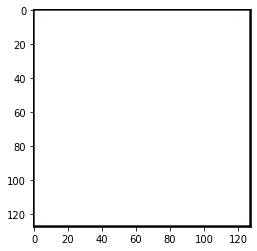

In [66]:
img = Image.open(directory+'//no-gesture//no-gesture_0.jpg')
plt.imshow(img, cmap='gray')

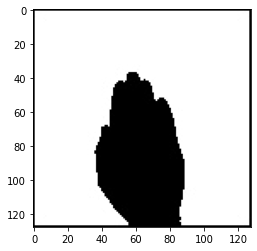

In [67]:
img = Image.open(directory+'//play-n-Stop//play-n-Stop_0.jpg')
plt.imshow(img, cmap='gray')

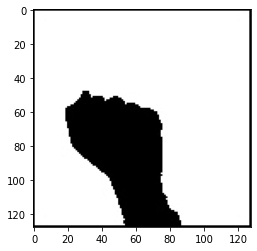

In [68]:
img = Image.open(directory+'//mute//mute_0.jpg')
plt.imshow(img, cmap='gray')

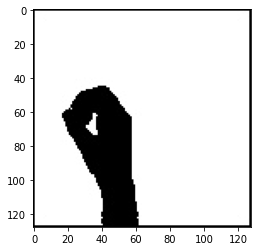

In [69]:
img = Image.open(directory+'//loop//loop_0.jpg')
plt.imshow(img, cmap='gray')

## 2.Training CNN model

### Import of keras model and hidden layers for our convolutional network

In [70]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

### Building the CNN

In [89]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [90]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Preparing the train/test data and training the model

In [91]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(DATASET_PATH +'//train',
                                                 target_size=(128, 128),
                                                 batch_size=5,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(DATASET_PATH +'//test',
                                            target_size=(128, 128),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 1330 images belonging to 15 classes.
Found 675 images belonging to 15 classes.


In [92]:
history = model.fit(
    training_set,
    steps_per_epoch=80,
    epochs=5,
    validation_data=test_set,
    validation_steps=30)

Epoch 1/5
80/80 [==============================] - 28s 340ms/step - loss: 2.1624 - accuracy: 0.3125 - val_loss: 1.3420 - val_accuracy: 0.5200
Epoch 2/5
80/80 [==============================] - 28s 349ms/step - loss: 1.2767 - accuracy: 0.5950 - val_loss: 0.9479 - val_accuracy: 0.7133
Epoch 3/5
80/80 [==============================] - 27s 335ms/step - loss: 0.8106 - accuracy: 0.7250 - val_loss: 0.3898 - val_accuracy: 0.8667
Epoch 4/5
80/80 [==============================] - 28s 349ms/step - loss: 0.5030 - accuracy: 0.8200 - val_loss: 0.3696 - val_accuracy: 0.8200
Epoch 5/5
80/80 [==============================] - 25s 313ms/step - loss: 0.3712 - accuracy: 0.8925 - val_loss: 0.1733 - val_accuracy: 0.9400


### Train accuracy

In [93]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

266/266 [==============================] - 18s 69ms/step - loss: 0.3665 - accuracy: 0.8880
Train accuracy: 88.80%


### Test accuracy

In [94]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

135/135 [==============================] - 8s 57ms/step - loss: 0.1900 - accuracy: 0.9452
Test accuracy: 94.52%


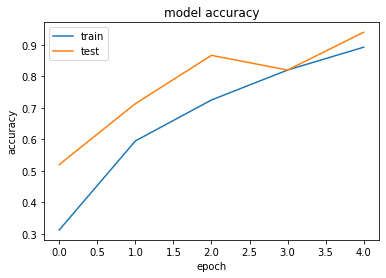

In [97]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()